# 36 Mice Feature Selection

## Yu Lab
### Uthman Qureshi
### Professor Lei Yu

#### Step 1:
Importing dataset and transforming features to use in our project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

%matplotlib inline
# Format data into something more useable
df = pd.read_csv('decimal-dataset.csv')
Y = pd.DataFrame(['A','A','A','B','B','B', 'C', 'C', 'C ','D','D','D'])
df = df.drop(columns=['Label'])

In [2]:
sel = VarianceThreshold(threshold=(.99))
X = pd.DataFrame(sel.fit_transform(df))
acc = []
features = []
for i in range(10,200):
    X_new = pd.DataFrame(SelectKBest(chi2, k=i).fit_transform(X, Y))
    y = Y
    y_true, y_pred = [],[]
    loo = LeaveOneOut()
    loo.get_n_splits(X)

    for train_index, test_index in loo.split(X_new,y):
        X_train, X_test = X_new.iloc[train_index], X_new.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        y_true.append(y_test[0])
        y_pred.append(yhat[0])
    accuracy = accuracy_score(y_true,y_pred)
    acc.append(accuracy)
    features.append(i)


Text(0, 0.5, 'Accuracy Score')

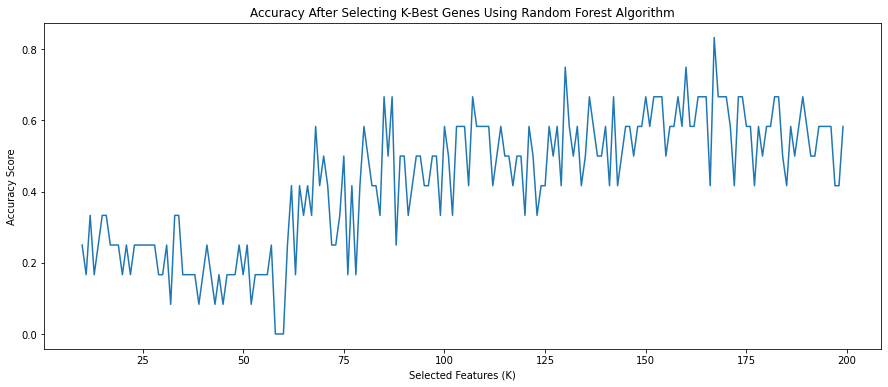

In [5]:
fig = plt.figure(figsize=(15, 6))
salplot = plt.subplot(1,1,1)
plot = plt.plot(features,acc)
salplot.set_title('Accuracy After Selecting K-Best Genes Using Random Forest Algorithm')
salplot.set_xlabel('Selected Features (K)')
salplot.set_ylabel('Accuracy Score')